<a href="https://colab.research.google.com/github/aristotelis79/collab/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

We'll use the [Boston Housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) Dataset for this demo. This is an open-source dataset which contains information collected by the U.S Census Service concerning housing in the area of Boston.

Each samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s.
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per `$10,000`
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: percentage of lower status of the population

The targets are the median values of the houses at a location in 1000s of dollars.
* MEDV: Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
print("Number of train samples: ", x_train.shape)
print("Number of test samples: ", x_test.shape)

Number of train samples:  (404, 13)
Number of test samples:  (102, 13)


In [5]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
y_train[0]

15.2

We'll use the MinMaxScaler from Scikit-learn library to perform the feature scaling. To know more about this normalizer, please refer to this [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()
mms.fit(x_train)

MinMaxScaler()

In [11]:
x_train = mms.transform(x_train)
x_test = mms.transform(x_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(100, input_dim = 13, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [14]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11601 (45.32 KB)
Trainable params: 11601 (45.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 3s 37ms/step - loss: 531.8791 - mae: 21.1419 - val_loss: 544.1074 - val_mae: 21.3805
Epoch 2/200
11/11 [==============================] - 0s 10ms/step - loss: 433.1053 - mae: 18.5640 - val_loss: 427.3184 - val_mae: 18.3102
Epoch 3/200
11/11 [==============================] - 0s 9ms/step - loss: 318.3091 - mae: 15.0616 - val_loss: 297.7256 - val_mae: 14.2098
Epoch 4/200
11/11 [==============================] - 0s 10ms/step - loss: 209.9390 - mae: 11.3495 - val_loss: 193.5550 - val_mae: 10.8546
Epoch 5/200
11/11 [==============================] - 0s 10ms/step - loss: 144.4678 - mae: 9.0784 - val_loss: 144.2884 - val_mae: 9.1949
Epoch 6/200
11/11 [==============================] - 0s 10ms/step - loss: 116.5595 - mae: 8.0910 - val_loss: 119.1482 - val_mae: 8.3130
Epoch 7/200
11/11 [==============================] - 0s 9ms/step - loss: 101.1044 - mae: 7.4701 - val_loss: 101.3310 - val_mae: 7.5513
Epoch 8/200
11/11 [=======================

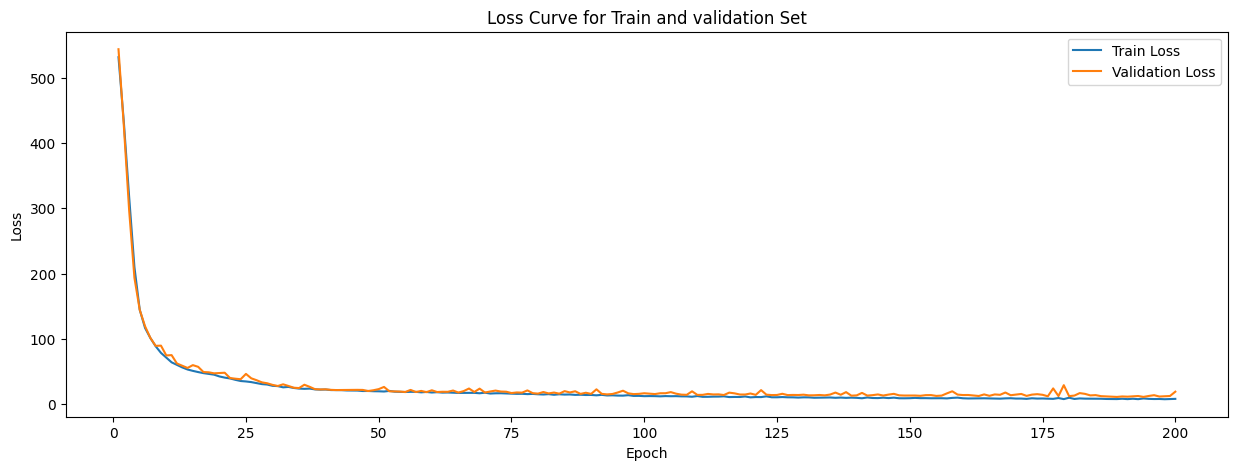

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1),
         hist.history['val_loss'])
plt.title('Loss Curve for Train and validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

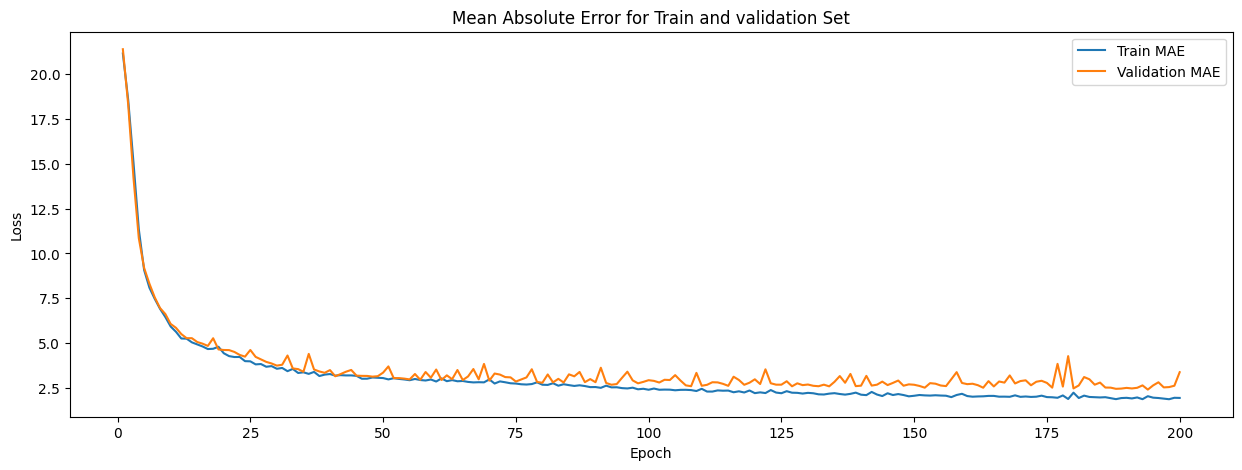

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1),
         hist.history['val_mae'])
plt.title('Mean Absolute Error for Train and validation Set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train MAE', 'Validation MAE'])
plt.show()

In [19]:
result = model.evaluate(x_test, y_test)
for i in range(len(result)):
    print(f'Test {model.metrics_names[i]} = {result[i]}')


4/4 [==============================] - 0s 3ms/step - loss: 31.8219 - mae: 3.7748
Test loss = 31.821884155273438
Test mae = 3.7748377323150635


We'll use r2_score from scikit-learn to calculate the r-square score for out model. To know more about this function, please go through this [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [20]:
from sklearn.metrics import r2_score

In [21]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [22]:
r2_score(y_test, y_pred)

0.6177268911334738